# I. DATA

## Financial Derivative Option 

Coursework for the Financial Derivative (Option Pricing Model) Analysis.

This is a report made with the intention to sell a Financial Derivative (Option) based on the Cryptocurrency asset POLKADOT at its USD Value, its ticker is DOT-USD, and its spot price (value) we will use the one taken from yahoo finance at date (28/03/2023) from which we will design an option with its due analysis.   

Methodically, in matters of coding, the first thing we shall use is to call the packacges we will use in order to fulfill and analyze the task of pricing our financial derivative.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os
from mpl_toolkits.mplot3d import Axes3D

### Relevant Data 

In this incise we're gonna collect the historical data relevant to our Financial Derivative pricing. The time frame chosen for the analysis is one year, which will be from March 28th 2022 to March 29th 2023 (we use one day more to visualize the closing spot price of our underlying assset in the chosen date). 

In [2]:
initial_data = yf.download("DOT-USD", start="2022-03-28", end="2023-03-29")

[*********************100%***********************]  1 of 1 completed


In [3]:
initial_data.head() # To visualize the Initial values of our data frame

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-28,22.450680,23.266171,21.900141,21.970449,21.970449,1265796274
2022-03-29,21.955490,22.910557,21.892668,22.486179,22.486179,1167942746
2022-03-30,22.482256,22.968292,21.772602,22.468348,22.468348,1114497681
2022-03-31,22.460417,22.999462,21.183681,21.302511,21.302511,1190050413
2022-04-01,21.309723,22.133127,20.722673,22.016987,22.016987,1125808777


In [4]:
initial_data.tail() #  To visualize the ending values of our data frame

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-24,6.325593,6.339621,5.969332,6.028030,6.028030,188002485
2023-03-25,6.028427,6.081402,5.856515,5.908658,5.908658,116202000
2023-03-26,5.909045,6.105055,5.893980,6.052051,6.052051,107617552
2023-03-27,6.052090,6.105624,5.772027,5.873617,5.873617,147793061
2023-03-28,5.873514,6.096055,5.806787,6.064447,6.064447,134330840


In [5]:
data =  initial_data['Adj Close']
data.info()
# We're setting the Adj Closed data as a new DataFrame we will use, since what we care for is the closing price of the underlying Asset


<class 'pandas.core.series.Series'>
DatetimeIndex: 366 entries, 2022-03-28 to 2023-03-28
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [6]:
data.head()

Date
2022-03-28    21.970449
2022-03-29    22.486179
2022-03-30    22.468348
2022-03-31    21.302511
2022-04-01    22.016987
Name: Adj Close, dtype: float64

In [7]:
data.tail()

Date
2023-03-24    6.028030
2023-03-25    5.908658
2023-03-26    6.052051
2023-03-27    5.873617
2023-03-28    6.064447
Name: Adj Close, dtype: float64

### Descriptive Statistics 

Here we present the summary of the descriptive statistics of our underlying asset, under a 1 year data

In [8]:
data.describe().round(3)

count    366.000
mean       8.149
std        4.037
min        4.282
25%        6.046
50%        6.758
75%        8.203
max       23.208
Name: Adj Close, dtype: float64

### GRAPHIC MOVEMENTS & Annualized Volatility

Value movement (Plot/ Shape) of the underlying asset (DOT-USD)

array([<AxesSubplot:xlabel='Date'>], dtype=object)

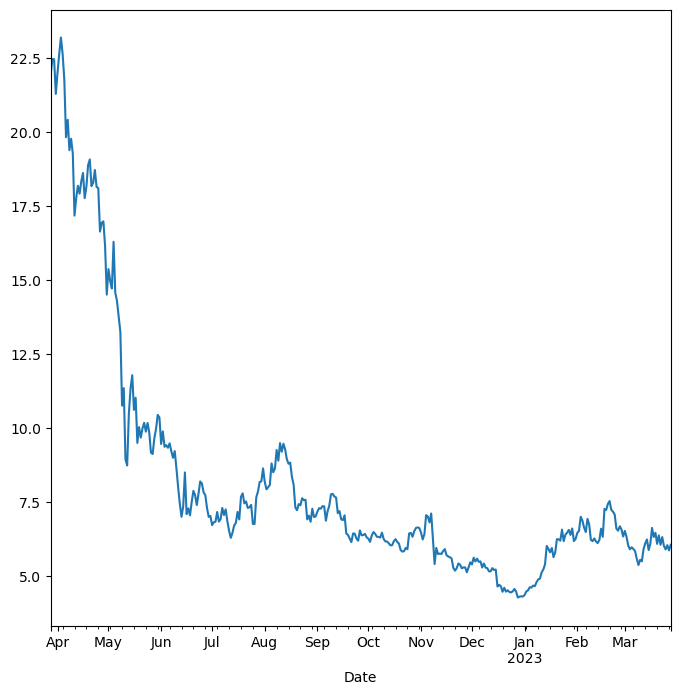

In [9]:
data.plot(figsize=(8, 8), subplots=True)

### POLKADOT's value changes over time

From a better understanding from the statistical point of view we will use both percentage, & logarithmic return changes for the financial context and visualization of the annualized volatility:

In [10]:
data.pct_change().round(4).head()

Date
2022-03-28       NaN
2022-03-29    0.0235
2022-03-30   -0.0008
2022-03-31   -0.0519
2022-04-01    0.0335
Name: Adj Close, dtype: float64

In [11]:
data.pct_change().round(4).tail()

Date
2023-03-24   -0.0470
2023-03-25   -0.0198
2023-03-26    0.0243
2023-03-27   -0.0295
2023-03-28    0.0325
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

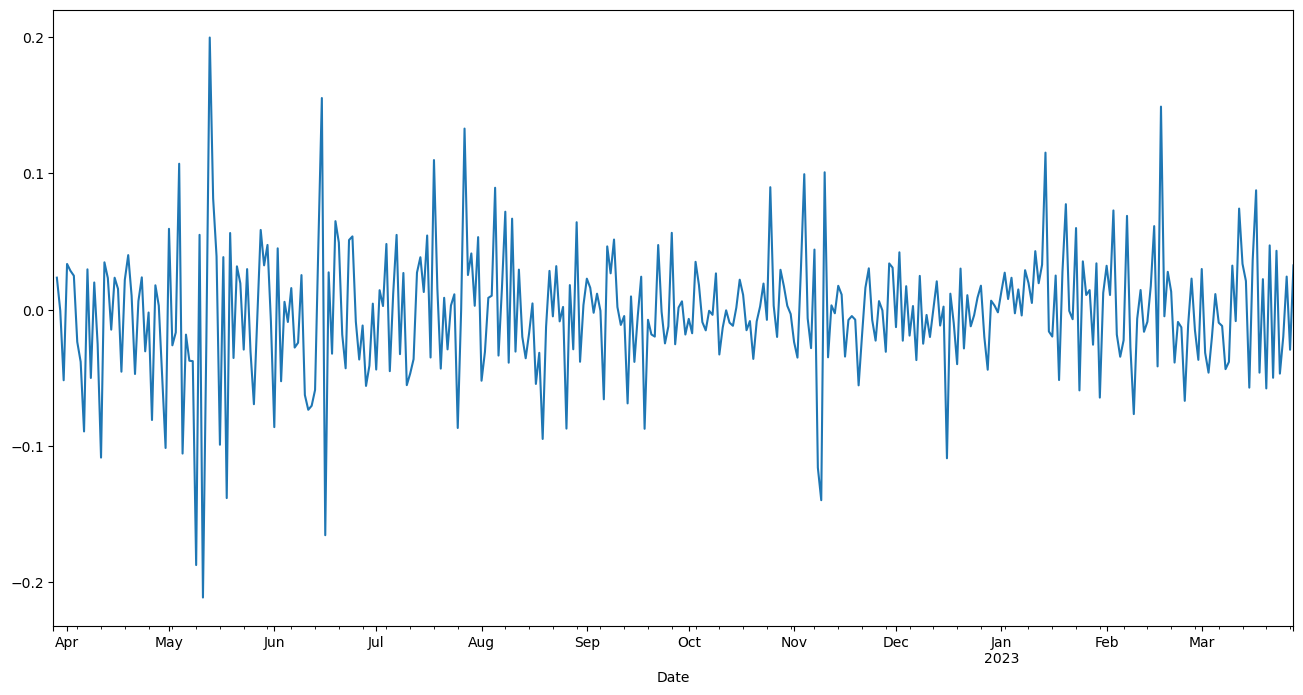

In [12]:
data.pct_change().plot(figsize=(16, 8))

Here we see the Log Returns from the daily data obtained

In [13]:
Log_returns = np.log(data / data.shift(1))
Log_returns.head().round(4)

Date
2022-03-28       NaN
2022-03-29    0.0232
2022-03-30   -0.0008
2022-03-31   -0.0533
2022-04-01    0.0330
Name: Adj Close, dtype: float64

In [14]:
Log_returns.tail().round(4)

Date
2023-03-24   -0.0482
2023-03-25   -0.0200
2023-03-26    0.0240
2023-03-27   -0.0299
2023-03-28    0.0320
Name: Adj Close, dtype: float64

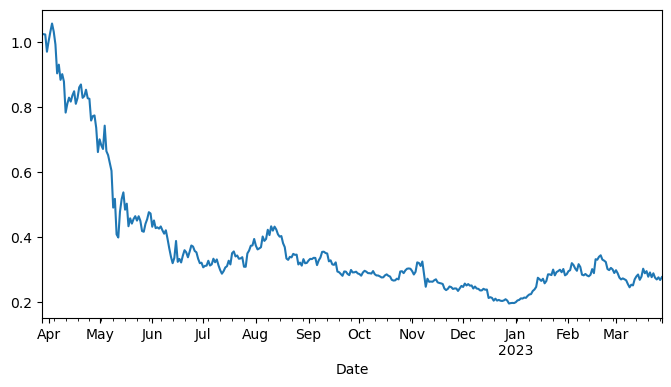

In [15]:
Log_returns.cumsum().apply(np.exp).plot(figsize=(8, 4));

## Annualized Volatility

Here we use a calculation of the Annualized Volatility, to see how the underlying asset's value has fluctuated over the last year. As requested we will use the data from the last 6 months to calculate the annualized volatility of the underlying asset, since it's a cryptocurrency it trades for 365 days, we will choose the data from 182 days.

In [16]:
vol = np.sqrt(365) * Log_returns[-182:].std() #We select the volatily of the last 6 months to annualize the 
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 72.61 %


# II. METHODOLOGY

## Financial Derivative Design 

### Option Pricing

We have decided to price the Option under the European option scheme, commonly known as "Vanilla Option" and we will compare the resulting pricing between call & put, as well as we will continue to advance this throughout the different methodologies of pricing our financial derivatives.

### Black Scholes Model

We have decided to price this financial derivative with the Black Scholes Methodology, which assumes that the price of the underlaying asset (DOT-USD) is follwing a continuous Brownian motion process, and takes into account the effect of dividends or cash flows. This method provides the basis for pricing an European call or put option, as well as the implied volatility of the latter, which is the one that belongs to our underlying's asset market price.

#### Components for the Option Pricing

Here we define the Components needed to calculate the option pricing under the black scholes methodology:

S= Current market price of the underlying asset on which the option is based;

K= This is the price at which the option can be exercised;

T= This is the amount of time left until the option expires;

r= Current rate of return on an investment with no risk, like the yield on T-bills/notes;

vol= Degree of variation of the asset's price overtime, which is estimated from the current mkt. price of the option;

q= Current dividend yield on the underlying asset if applicable;

payoff= Whether this option is a call or put option.

### POLKADOT European Options

Now we're going to calculate the option price for Polkadot, using the components described before (minus dividend, for in this asset dividends do not really apply):

##### --------Components & Option Pricing---------

In [17]:
data.tail()

Date
2023-03-24    6.028030
2023-03-25    5.908658
2023-03-26    6.052051
2023-03-27    5.873617
2023-03-28    6.064447
Name: Adj Close, dtype: float64

In [18]:
S = data[-1]         # Spot price equals the closing price of the last day in our "DOT-USD" data

print('The spot price is USD $', round(S,4))

The spot price is USD $ 6.0644


In [19]:
K = 7.2773           # Strike Price will be at an increase of 20% more of the spot price, 
T = 1                # Time to maturity is one year
r = 0.0355           # risk free rate from Treasure notes as of 29/03/2023

In [20]:
def polkadot_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        crypto_option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        crypto_option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return crypto_option_value

In [21]:
call = polkadot_option_bs(S, K, T, r, vol, 'call')
print('The BS polkadot call option price is US $', round(call, 4))

The BS polkadot call option price is US $ 1.4113


In [22]:
put = polkadot_option_bs(S, K, T, r, vol, 'put')
print('The BS polkadot put option price is US $', round(put, 4))

The BS polkadot put option price is US $ 2.3703


In [23]:
polkadot_option_bs(S, K, T, r, vol, 'call')

1.4113070928293387

In [24]:
polkadot_option_bs(S, K, T, r, vol, 'put')

2.370347840524379

In [25]:
S = np.linspace(3,15,21)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = polkadot_option_bs(S[i], K, T, r, vol, 'call')

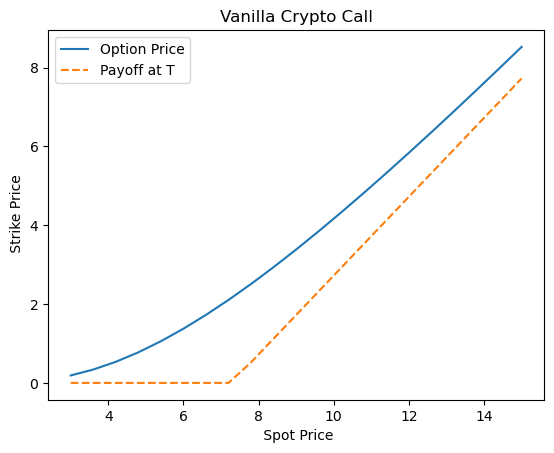

In [26]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-K,0), '--')
plt.xlabel(' Spot Price')
plt.ylabel(' Strike Price')
plt.title('Vanilla Crypto Call')
plt.legend(['Option Price','Payoff at T'])

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Now that we have estimated the pricing for the Polkadot option (as a vanilla type option) under the Black Scholes model, we now proceed to do a comparative analysis by calculating the option under a different methodology(ies).

## Binomial Tree (CRR Tree) 

We decided to use the Binomial tree pricing model approach, since its able to handle a variety of conditions that can be applied to it. The advantage to this method is that we manage to see the payoff of the underlying asset over the period of time selected, instead of a single point (maturity in the vanilla option case)

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

When it comes to Binomial Tree Option Pricing, the components remain basically the same, except that we're gonna add the number of steps or iterations that determine the final nodes, and then backwards to the initial nodes. our data is:

In [27]:
S = data[-1]      # spot stock price, we call it back to the original spot price, since it was turned into an array for the last plot
K                 # strike
T                 # maturity 
r                 # risk free rate 
vol               # diffusion coefficient or volatility
N = 5             # number of periods or number of time steps  
payoff = "call"   # payoff 

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Now we proceed to the creation of the Binomial price Tree

Binomial trees are produced by working from valuation to expiration & each step moves up or down under the assumption of specific factors S_up->(S * u) and S_down->(S * d)

In [28]:
dT = float(T) / N                             # Delta t
u = np.exp(vol * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [29]:
S_bt = np.zeros((N + 1, N + 1))
S_bt[0, 0] = S
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S_bt[i, t] = S_bt[i, t-1] * u
        S_bt[i+1, t] = S_bt[i, t-1] * d
    z += 1

In [30]:
S_bt

array([[ 6.06444693,  8.391014  , 11.61014629, 16.06426789, 22.22717067,
        30.75441216],
       [ 0.        ,  4.3829645 ,  6.06444693,  8.391014  , 11.61014629,
        16.06426789],
       [ 0.        ,  0.        ,  3.16770483,  4.3829645 ,  6.06444693,
         8.391014  ],
       [ 0.        ,  0.        ,  0.        ,  2.28939885,  3.16770483,
         4.3829645 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.65461979,
         2.28939885],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.19584521]])

In [31]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
print('The risk neutral up probability is', round((p*100), 2), '%')

The risk neutral up probability is 43.03 %


In [32]:
print('The risk neutral down probability is', round((q*100), 2), '%')

The risk neutral down probability is 56.97 %


In [33]:
S_T = S_bt[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        23.47711216],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         8.78696789],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.113714  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [34]:
# for Vanilla Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 1.44046583,  2.72347336,  5.01007962,  8.88957532, 15.00135651,
        23.47711216],
       [ 0.        ,  0.48938474,  1.03038839,  2.14243255,  4.38433213,
         8.78696789],
       [ 0.        ,  0.        ,  0.08686794,  0.20331258,  0.47584879,
         1.113714  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [35]:
print('Vanilla Polkadot ' + payoff, 'is US $', str( V[0,0]))

Vanilla Polkadot call is US $ 1.440465827805561


#### Now we proceed to apply this for the put option 
Since we have already found the call option for the Vanilla Polkadot Option, we will now proceed to do the same for the put option.

In [36]:
payoff = "put" 

In [37]:
S_T = S_bt[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        2.8943355 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        4.98790115],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        6.08145479]])

In [38]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[2.39950658, 1.40599125, 0.523866  , 0.        , 0.        ,
        0.        ],
       [0.        , 3.17995212, 2.08987414, 0.92611112, 0.        ,
        0.        ],
       [0.        , 0.        , 4.04309578, 2.99504065, 1.63721602,
        0.        ],
       [0.        , 0.        , 0.        , 4.88529372, 4.05810933,
        2.8943355 ],
       [0.        , 0.        , 0.        , 0.        , 5.57119437,
        4.98790115],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        6.08145479]])

In [39]:
print('Vanilla Polkadot ' + payoff, 'is US $', str( V[0,0]))

Vanilla Polkadot put is US $ 2.399506575500599


#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Montecarlo Simulation
Now we will price our crypto asset option under the Montecarlo Simulation model/method, in here we will calculate the option price by generating many iterations over the determined time intervals (steps). 

In [40]:
def mcs_simulation_np(m,n):       #m is the number of steps and n is the number of simulations
    M = m
    I = n
    dt = T / M 
    S_mcs = np.zeros((M + 1, I))
    S_mcs[0] = S 
    rn = np.random.standard_normal(S_mcs.shape) 
    for t in range(1, M + 1): 
        S_mcs[t] = S_mcs[t-1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * rn[t]) 
    return S_mcs

In [41]:
S_mcs = mcs_simulation_np(30,1000)

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

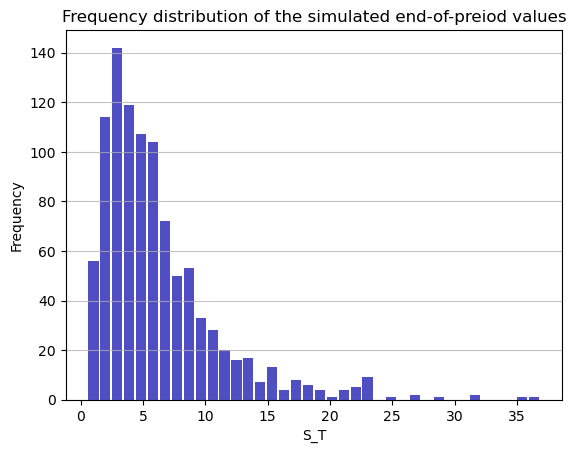

In [42]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S_mcs[-1,:], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [43]:
p_mcs = np.mean(np.maximum(S_mcs[-1,:] - K,0))
print('Polkadot vanilla call is US $', str(p_mcs))

Polkadot vanilla call is US $ 1.3839558932201315


In [44]:
c_mcs = np.mean(np.maximum(K - S_mcs[-1,:],0))
print('Polkadot vanilla put is US $', str(c_mcs))

Polkadot vanilla put is US $ 2.418870798865706


## Differences between Methodologies, Black Scholes, Binomial Tree & Montecarlo Simulation 
As we can denote, there are slight differences in the prices between the 3 different methodologies, even with the same input components on their formulas. The reasoning for this differences comes from the way each of the methods are established to work following different logistics associated with time sensitivity, type of time steps & number of iterations.

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# III. Analysis

## Greeks Calculation & Interpretation
As we have already calculated the values of our options both call & put, as well as calculating these prices using different methodologies. Now we're analyzing the Black Scholes equation, as well as the movement and sensitivity between some of the components and their respective interaction between each other, such as the underlying asset, time, discount rate, sigma, etc...

#### A VERY SPECIAL PORTFOLIO: Re-calling our Black Scholes Call - Put Option's prices
Since the Greeks are the definition & interpretation based upon the Black Scholes Option portfolio, we're now going to 

In [45]:
S = data[-1]         # Spot price equals the closing price of the last day in our "DOT-USD" data

print('The spot price is USD $', round(S,4))

The spot price is USD $ 6.0644


In [46]:
K = 7.2773           
T = 1                
r = 0.0355           

In [47]:
def polkadot_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        crypto_option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        crypto_option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return crypto_option_value

In [48]:
call = polkadot_option_bs(S, K, T, r, vol, 'call')
print('The BS polkadot call option price is US $', round(call, 4))

The BS polkadot call option price is US $ 1.4113


In [49]:
put = polkadot_option_bs(S, K, T, r, vol, 'put')
print('The BS polkadot put option price is US $', round(put, 4))

The BS polkadot put option price is US $ 2.3703


In [50]:
S = np.linspace(3,12,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = polkadot_option_bs(S[i], K, T, r, vol, 'call')
    Put [i] = polkadot_option_bs(S[i], K, T, r, vol, 'put')

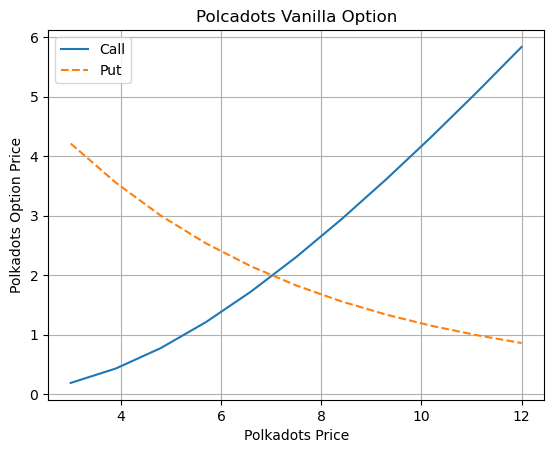

In [51]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Polkadots Price')
plt.ylabel('Polkadots Option Price')
plt.title('Polcadots Vanilla Option')
plt.legend(['Call','Put'])

### DELTA 
Delta (∆) measures the rate of change of the forecasted (calculated) option value with respect to changes in the underlying asset's price. mathematically is interpreted as the 1st derivative of teh value of the option respecting to the underlying asset's price.

In [52]:
S = data[-1] 
K = 7.2773           
T = 1                
r = 0.0355 
q = 0

In [53]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == 'call':
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == 'put':
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [54]:
delta_call = delta(S, K, T, r, q, vol, 'call')
print('The ∆ for polkadot call option is', round(delta_call, 6))

The ∆ for polkadot call option is 0.563892


In [55]:
delta_put = delta(S, K, T, r, q, vol, 'put')
print('The ∆ for polkadot put option is', round(delta_put, 6))

The ∆ for polkadot put option is -0.436108


### Movement of Delta
As we observe, ∆ values are different for both the put and call, we can visualize how sensitive both options' value is for a change in the underlying asset

In [56]:
S_del = np.linspace(1,12,11)
Delta_Call = np.zeros((len(S_del),1))
Delta_Put = np.zeros((len(S_del),1))
for i in range(len(S_del)):
    Delta_Call [i] = delta(S_del[i], K, T, r, q, vol, 'call')
    Delta_Put [i] = delta(S_del[i], K, T, r, q, vol, 'put')

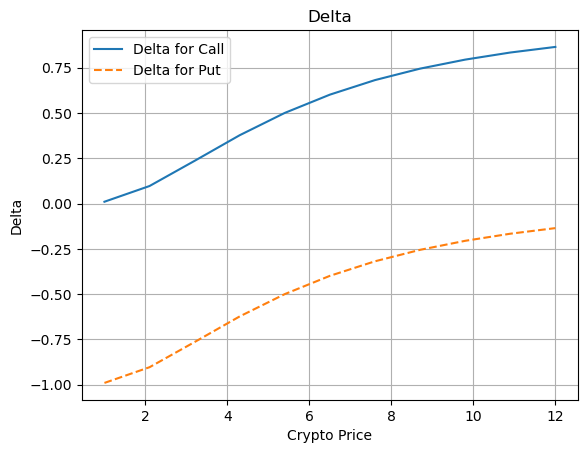

In [57]:
fig = plt.figure()
plt.plot(S_del, Delta_Call, '-')
plt.plot(S_del, Delta_Put, '--')
plt.grid()
plt.xlabel('Crypto Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### GAMMA Γ
This greek measures the rate of change in the delta with respect to changes in the underlying price(sensitivity of ∆ to S). Mathematically is represented as the first derivative of the delta ∆ function with respect to the underlying price. Its result has to be the same for both put & call

In [58]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [59]:
gamma_call = gamma(S, K, T, r, q, vol, 'call')
print('The Γ for polkadot call option is', round(gamma_call, 6))

The Γ for polkadot call option is 0.089435


In [60]:
gamma_put = gamma(S, K, T, r, q, vol, 'put')
print('The Γ for polkadot put option is', round(gamma_put, 6))

The Γ for polkadot put option is 0.089435


In [61]:
S_gam = np.linspace(1,12,11)        # S_gam as a new name to not loose the attributes to S
Gamma = np.zeros((len(S_gam),1))
for i in range(len(S_gam)):
    Gamma [i] = gamma(S_gam[i], K, T, r, q, vol, 'call')

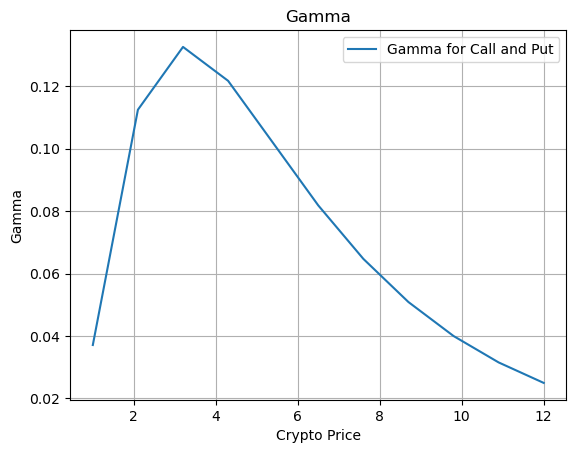

In [62]:
fig = plt.figure()
plt.plot(S_gam, Gamma, '-')
plt.grid()
plt.xlabel('Crypto Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put']) #Since Gamma is the same for both options, we only need to plot it once.

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### SPEED 
measures the rate of change in Gamma with respect to changes in the underlying price(Γ's sensitivity to S). Mathematically is derivative of gamma respecting the underlying asset.

In [63]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [64]:
speed_call = speed(S, K, T, r, q, vol, 'call')
print('The speed for polkadot call option is', round(speed_call, 6))

The speed for polkadot call option is -0.018014


In [65]:
speed_put = speed(S, K, T, r, q, vol, 'put')
print('The speed for polkadot put option is', round(speed_put, 6))

The speed for polkadot put option is -0.018014


In [66]:
S_spd = np.linspace(1,12,31)
Speed = np.zeros((len(S_spd),1))
for i in range(len(S_spd)):
    Speed [i] = speed(S_spd[i], K, T, r, q, vol, 'call')

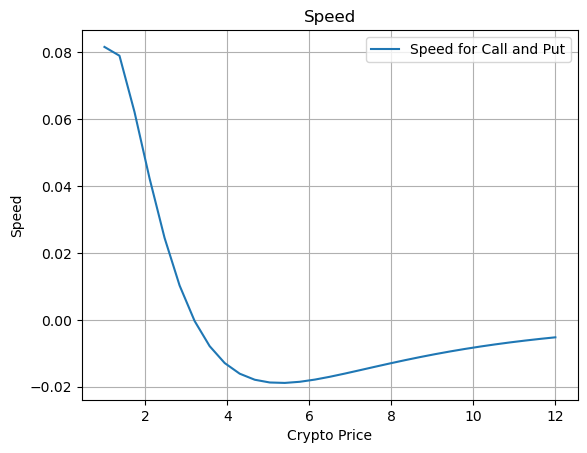

In [67]:
fig = plt.figure()
plt.plot(S_spd, Speed, '-')
plt.grid()
plt.xlabel('Crypto Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])    #Since speed is the same for both options, we only need to plot it once.

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### THETA 𝜃
This greek measures the sensitivity of the value of the derivative to the passage of time (see Option time value): also called the "time decay".

In [68]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [69]:
theta_call = theta(S, K, T, r, q, vol, 'call')
print('The 𝜃 for polkadot call option is', round(theta_call, 6))

The 𝜃 for polkadot call option is 0.938349


In [70]:
theta_put = theta(S, K, T, r, q, vol, 'put')
print('The 𝜃 for polkadot put option is', round(theta_put, 6))

The 𝜃 for polkadot put option is 0.689015


In [71]:
T_th = np.linspace(0.5,2,21)
Theta_Call = np.zeros((len(T_th),1))
Theta_Put = np.zeros((len(T_th),1))
for i in range(len(T_th)):
    Theta_Call [i] = theta(S, K, T_th[i], r, q, vol, 'call')
    Theta_Put [i] = theta(S, K, T_th[i], r, q, vol, 'put')

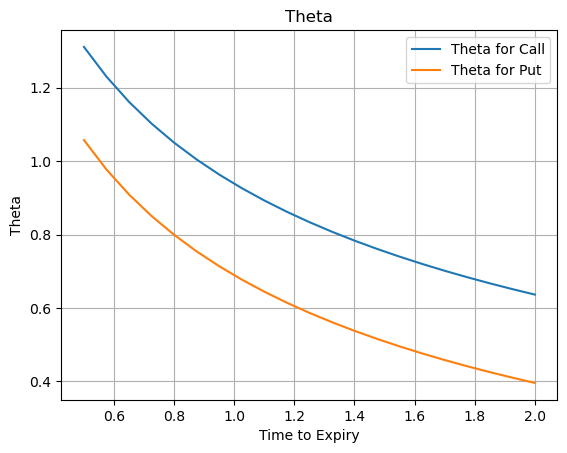

In [72]:
fig = plt.figure()
plt.plot(T_th, Theta_Call, '-')
plt.plot(T_th, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### RHO 𝜌
This greek measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [73]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [74]:
rho_call = rho(S, K, T, r, q, vol, 'call')
print('The  𝜌 for polkadot call option is', round(rho_call, 6))

The  𝜌 for polkadot call option is 2.008387


In [75]:
rho_put = rho(S, K, T, r, q, vol, 'put')
print('The  𝜌 for polkadot put option is', round(rho_put, 6))

The  𝜌 for polkadot put option is -5.015101


In [76]:
r_rh = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r_rh),1))
Rho_Put = np.zeros((len(r_rh),1))
for i in range(len(r_rh)):
    Rho_Call [i] = rho(S, K, r_rh[i], r, q, vol, 'call')
    Rho_Put [i] = rho(S, K, r_rh[i], r, q, vol, 'put')

/var/folders/c_/z_585r4d2pl60t1_pn3428mw0000gn/T/ipykernel_20269/4021413847.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
/var/folders/c_/z_585r4d2pl60t1_pn3428mw0000gn/T/ipykernel_20269/4021413847.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))


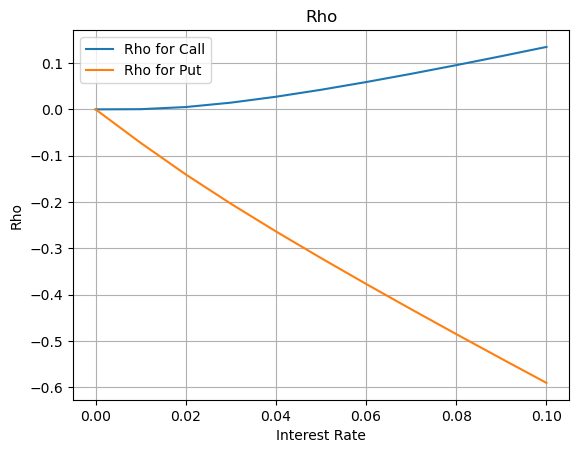

In [77]:
fig = plt.figure()
plt.plot(r_rh, Rho_Call, '-')
plt.plot(r_rh, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### VEGA
This greek measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.


In [78]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [79]:
vega_call = vega(S, K, T, r, q, vol, 'call')
print('The  vega for polkadot call option is', round(vega_call, 6))

The  vega for polkadot call option is 2.38827


In [80]:
vega_put = vega(S, K, T, r, q, vol, 'put')
print('The  vega for polkadot put option is', round(vega_put, 6))

The  vega for polkadot put option is 2.38827


In [81]:
vol_vg = np.linspace(0.1,3,13)
Vega = np.zeros((len(vol_vg),1))
for i in range(len(vol_vg)):
    Vega [i] = vega(S, K, T, r, q, vol_vg[i], 'call')

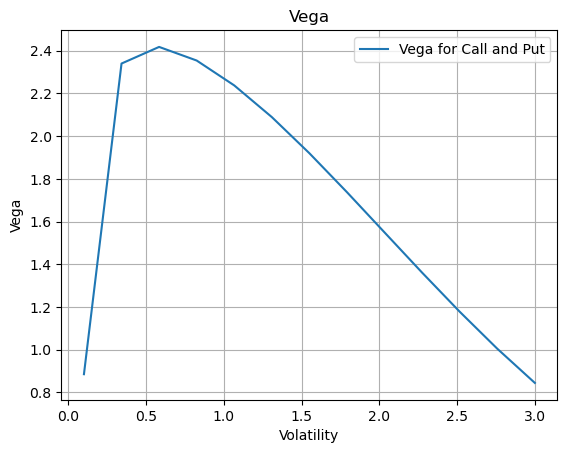

In [82]:
fig = plt.figure()
plt.plot(vol_vg, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## GREEKS' SURFACE
Now we're gonna represent the behavior of the greeks in a more complex & visible way, as we want to better understand the multidimensional analysis of the financial derivative (option value).

• Delta, Gamma, Speed, Theta, Rho & Vega, are the greeks to analyze in this surfase analysis

### Delta Surface

In [83]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [84]:
S_dsf = np.linspace(1, 12, 31)
T_dsf = np.linspace(0.25, 2, 31)
Delta = np.zeros((len(T_dsf),len(S_dsf)))
for j in range(len(S_dsf)):
    for i in range(len(T_dsf)):
        Delta[i,j] = delta(S_dsf[j], K, T_dsf[i], r, q, vol, 'call')

/var/folders/c_/z_585r4d2pl60t1_pn3428mw0000gn/T/ipykernel_20269/1255241339.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


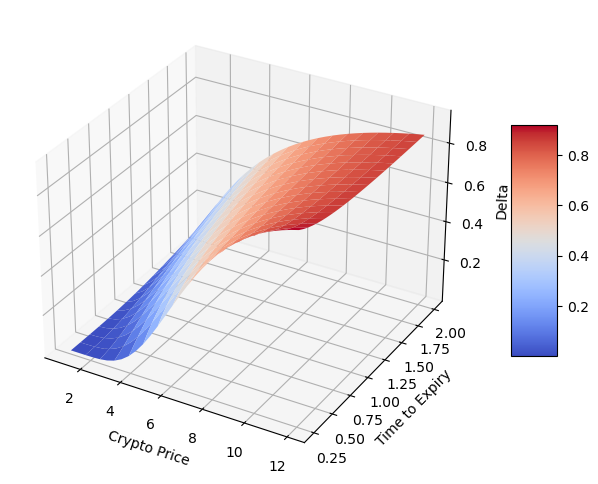

In [85]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S_dsf, T_dsf = np.meshgrid(S_dsf, T_dsf)
surf = ax.plot_surface(S_dsf, T_dsf, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [86]:
d = delta(S, K, T, r, q, vol, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.5639 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.5639 .


### Gamma Surface

In [87]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [88]:
S_gsf = np.linspace(1, 12, 31)
T_gsf = np.linspace(0.25, 2, 31)
Gamma = np.zeros((len(T_gsf),len(S_gsf)))
for j in range(len(S_gsf)):
    for i in range(len(T_gsf)):
        Gamma[i,j] = gamma(S_gsf[j], K, T_gsf[i], r, q, vol, 'call')

/var/folders/c_/z_585r4d2pl60t1_pn3428mw0000gn/T/ipykernel_20269/1313534546.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


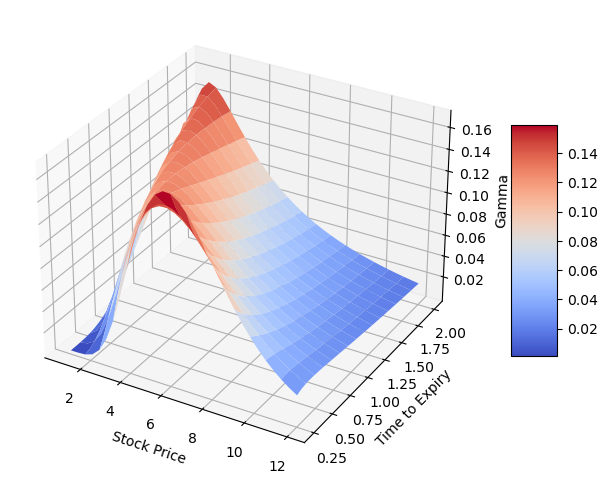

In [89]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S_gsf, T_gsf = np.meshgrid(S_gsf, T_gsf)
surf = ax.plot_surface(S_gsf, T_gsf, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [90]:
g = gamma(S, K, T, r, q, vol, 'call')
print('The value of Gamma is', g.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase by a factor of gamma', g.round(4), '.')

The value of Gamma is 0.0863 . If the stock price increase 1 dollar, then the value of the option will increase by a factor of gamma 0.0863 .


### Speed Surface

In [91]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [92]:
S_ssf = np.linspace(1, 12, 31)
T_ssf = np.linspace(0.25, 2, 31)
Speed = np.zeros((len(T_ssf),len(S_ssf)))
for j in range(len(S_ssf)):
    for i in range(len(T_ssf)):
        Speed[i,j] = speed(S_ssf[j], K, T_ssf[i], r, q, vol, 'call')

/var/folders/c_/z_585r4d2pl60t1_pn3428mw0000gn/T/ipykernel_20269/943897064.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


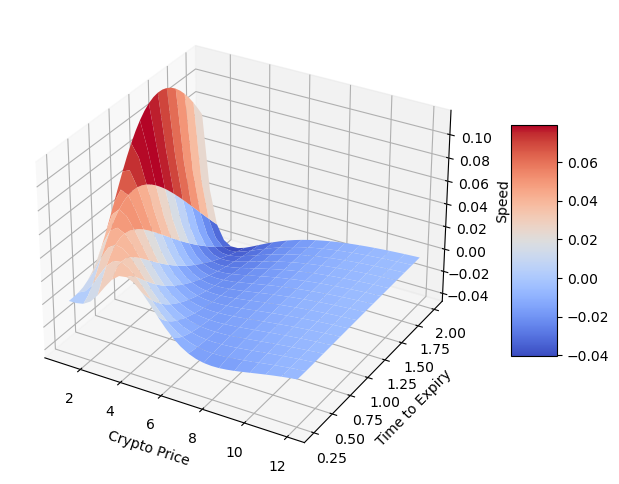

In [93]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S_sst, T_ssf = np.meshgrid(S_ssf, T_ssf)
surf = ax.plot_surface(S_ssf, T_ssf, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [94]:
sp = speed(S, K, T, r, q, vol, 'call')
print('The value of Speed is', sp.round(4),'.','If the stock price increase 1 dollar, then gamma by a factor of', sp.round(4), '.')

The value of Speed is -0.018 . If the stock price increase 1 dollar, then gamma by a factor of -0.018 .


### Theta Surface

In [95]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [96]:
S_tsf = np.linspace(1, 12, 31)
T_tsf = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T_tsf),len(S_tsf)))
for j in range(len(S_tsf)):
    for i in range(len(T_tsf)):
        Theta[i,j] = theta(S_tsf[j], K, T_tsf[i], r, q, vol, 'call')

/var/folders/c_/z_585r4d2pl60t1_pn3428mw0000gn/T/ipykernel_20269/208744228.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


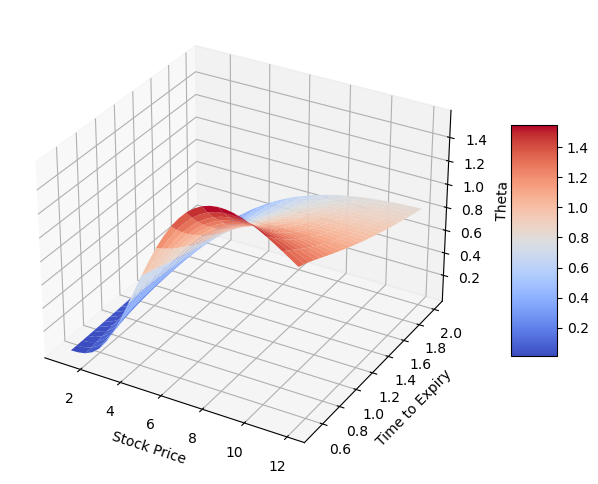

In [97]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S_tsf, T_tsf = np.meshgrid(S_tsf, T_tsf)
surf = ax.plot_surface(S_tsf, T_tsf, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [98]:
thc = theta(S, K, T, r, q, vol, 'call')
print('The value of Theta is', thc.round(4),'.','If the time to maturity increases in a week (1/52), then the value of the call option increases in 1/52 per', thc.round(4), '.')

The value of Theta is 0.9383 . If the time to maturity increases in a week (1/52), then the value of the call option increases in 1/52 per 0.9383 .


### Rho Surface

In [99]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [100]:
S_rsf = np.linspace(1, 12, 31)
T_rsf = np.linspace(0.25, 2, 31)
Rho = np.zeros((len(T_rsf),len(S_rsf)))
for j in range(len(S_rsf)):
    for i in range(len(T_rsf)):
        Rho[i,j] = rho(S_rsf[j], K, T_rsf[i], r, q, vol, 'call')

/var/folders/c_/z_585r4d2pl60t1_pn3428mw0000gn/T/ipykernel_20269/236488168.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


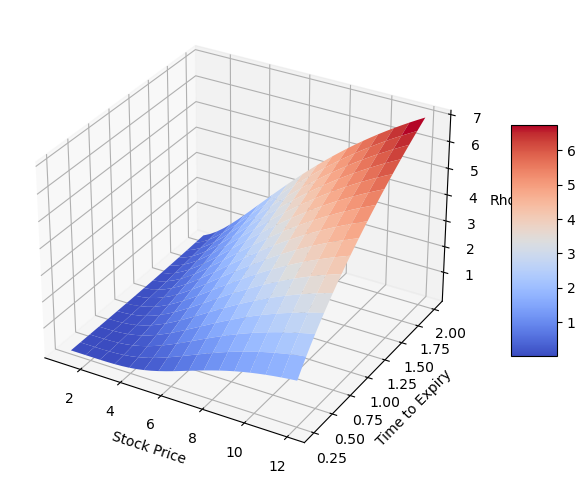

In [101]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S_rsf, T_rsf = np.meshgrid(S_rsf, T_rsf)
surf = ax.plot_surface(S_rsf, T_rsf, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [102]:
rhc = rho(S, K, T, r, q, vol, 'call')
print('The value of Rho is', rhc.round(4),'.','If the interest rate increases in a 1%, then the value of the call option increases in 1% (0.01) per', rhc.round(4), '.')

The value of Rho is 2.0084 . If the interest rate increases in a 1%, then the value of the call option increases in 1% (0.01) per 2.0084 .


###  Vega Surface

In [103]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [104]:
S_vsf = np.linspace(1, 12, 31)
T_vsf = np.linspace(0.2, 2, 31)
Vega = np.zeros((len(T_vsf),len(S_vsf)))
for j in range(len(S_vsf)):
    for i in range(len(T_vsf)):
        Vega[i,j] = vega(S_vsf[j], K, T_vsf[i], r, q, vol, 'call')

/var/folders/c_/z_585r4d2pl60t1_pn3428mw0000gn/T/ipykernel_20269/3119665560.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


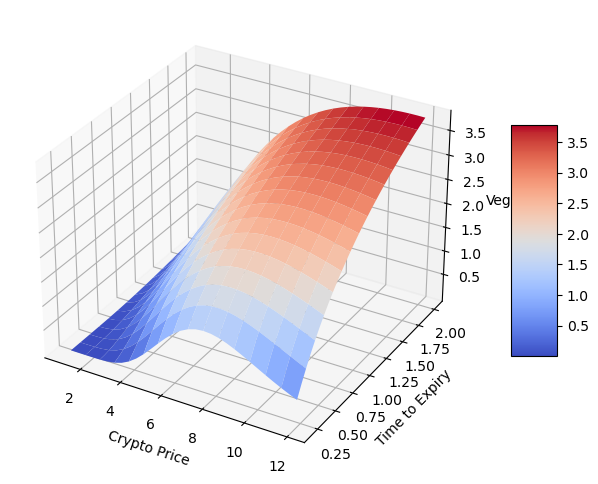

In [105]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S_vsf, T_vsf = np.meshgrid(S_vsf, T_vsf)
surf = ax.plot_surface(S_vsf, T_vsf, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [106]:
v = vega(S, K, T, r, q, vol, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases in a 1%, then the value of the call option increases in 1% (0.01) per', v.round(4), '.')

The value of Vega is 2.3883 . If the volatility increases in a 1%, then the value of the call option increases in 1% (0.01) per 2.3883 .
